# Pyber Ridesharing Data Analysis
The most important finding in the data analysis below is that even though most fares come from urban cities, rural cities are proportionally more profitable. Therefore, Pyber should consider focusing their marketing efforts to expand further into rural cities.
-  Port James was a significant outlier with 64 total rides in the suburban city. It was excluded from the bubble chart for a more seamless visualization
-  Though urban cities tend to have a higher demand for more shared rides, the average fare tends to be lower than in rural cities. It's safe to assume that this is due to higher competition of drivers in big cities.
-  However, as we can observe in the first pie chart, most fares still come from urban cities due to high volume

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the data file
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

# Merge the data tables on city
pyber_df = pd.merge(city_df,ride_df,on="city")

pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


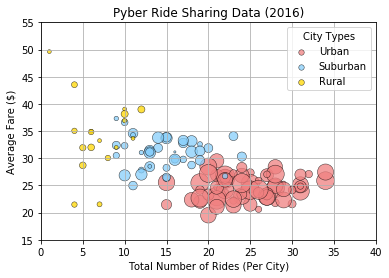

Note: Circle size correlates to driver count per city


In [2]:
# Divide by the three city types
urban_df = pyber_df.loc[pyber_df["type"] == "Urban",:]
suburb_df = pyber_df.loc[pyber_df["type"] == "Suburban",:]
rural_df = pyber_df.loc[pyber_df["type"] == "Rural",:]

city_df_urban = city_df.loc[city_df["type"]=="Urban",:]
city_df_suburb = city_df.loc[city_df["type"]=="Suburban",:]
city_df_rural = city_df.loc[city_df["type"]=="Rural",:]

# Group by city
urban_cities = urban_df.groupby(["city"])
suburb_cities = suburb_df.groupby(["city"])
rural_cities = rural_df.groupby(["city"])

# Set urban variables
avg_fare_urban = urban_cities["fare"].mean()
total_rides_urban = urban_cities["ride_id"].count()
total_drivers_urban = city_df_urban["driver_count"]

# Set suburban variables
avg_fare_suburb = suburb_cities["fare"].mean()
total_rides_suburb = suburb_cities["ride_id"].count()
total_drivers_suburb = city_df_suburb["driver_count"]

# Set rural variables
avg_fare_rural = rural_cities["fare"].mean()
total_rides_rural = rural_cities["ride_id"].count()
total_drivers_rural = city_df_rural["driver_count"]

# Plot urban data into scatter plot
urban = plt.scatter(total_rides_urban,avg_fare_urban,s=total_drivers_urban*5,marker="o",facecolor="lightcoral",
                    edgecolors="black",alpha=0.75,linewidth =.5)
# Plot suburban data into scatter plot
suburb = plt.scatter(total_rides_suburb,avg_fare_suburb,s=total_drivers_suburb*5,marker="o",facecolor="lightskyblue",
                     edgecolors="black",alpha=0.75,linewidth =.5)
# Plot rural data into scatter plot
rural = plt.scatter(total_rides_rural,avg_fare_rural,s=total_drivers_rural*5,marker="o",facecolor="gold",
            edgecolors="black",alpha=0.75,linewidth =.5)

# AESTHETICS
# Exclude the outlier by setting up limits for x-axis
plt.xlim(0, 40)
plt.ylim(15,55)
# Add a grid
plt.rc('grid', linestyle="-", alpha=0.15)
plt.grid(True)
# Add legend
lgnd = plt.legend((urban, suburb, rural),
           ('Urban', 'Suburban', 'Rural'),
           loc='best',title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.show()
print("Note: Circle size correlates to driver count per city")

In [3]:
# There's a remarkable outlier, find out what it is
suburb_cities["ride_id"].count() 
print("Port James is the outlier with 64 total rides")

Port James is the outlier with 64 total rides


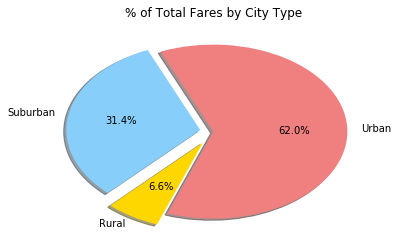

In [4]:
# PRODUCE PIE CHARTS
# Fare Distribution
total_fares = pyber_df["fare"].sum()
urban_fares = (urban_df["fare"].sum()/total_fares)*100
suburb_fares = (suburb_df["fare"].sum()/total_fares)*100
rural_fares = (rural_df["fare"].sum()/total_fares)*100

city_types = ["Urban","Suburban","Rural"]
sizes = [urban_fares,suburb_fares,rural_fares]
colors = ["lightcoral","lightskyblue","gold"]
explode =[0,0.1,0.15]

plt.pie(sizes,labels=city_types,colors=colors,autopct ="%1.1f%%",shadow=True,startangle=250,explode=explode)
plt.title("% of Total Fares by City Type")

plt.show()

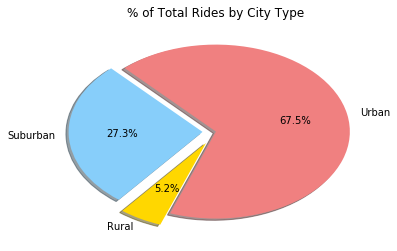

In [5]:
# Ride Distribution
total_rides = pyber_df["date"].count()
urban_rides = (urban_df["date"].count()/total_rides)*100
suburb_rides = (suburb_df["date"].count()/total_rides)*100
rural_rides = (rural_df["date"].count()/total_rides)*100

city_types = ["Urban","Suburban","Rural"]
sizes = [urban_rides,suburb_rides,rural_rides]
colors = ["lightcoral","lightskyblue","gold"]
explode =[0,0.1,0.15]

plt.pie(sizes,labels=city_types,colors=colors,autopct ="%1.1f%%",shadow=True,startangle=250,explode=explode)
plt.title("% of Total Rides by City Type")

plt.show()

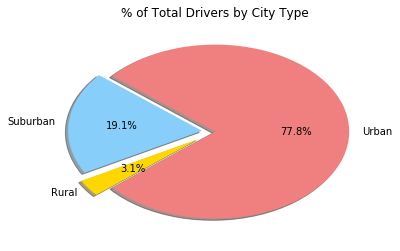

In [6]:
# Drivers Distribution
total_drivers = city_df["driver_count"].sum()

urban_drivers = city_df.loc[city_df["type"]=="Urban",:]
urban_pct = (urban_drivers["driver_count"].sum()/total_drivers)*100

suburb_drivers = city_df.loc[city_df["type"]=="Suburban",:]
suburb_pct = (suburb_drivers["driver_count"].sum()/total_drivers)*100

rural_drivers = city_df.loc[city_df["type"]=="Rural",:]
rural_pct = (rural_drivers["driver_count"].sum()/total_drivers)*100

city_types = ["Urban","Suburban","Rural"]
sizes = [urban_pct,suburb_pct,rural_pct]
colors = ["lightcoral","lightskyblue","gold"]
explode =[0,0.1,0.15]

plt.pie(sizes,labels=city_types,colors=colors,autopct ="%1.1f%%",shadow=True,startangle=220,explode=explode)
plt.title("% of Total Drivers by City Type")

plt.show()